In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read and prind the data
min_df = pd.read_csv("Bird_strikes.csv")
min_df.head()

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [3]:
min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [4]:
min_df.describe()

,RecordID,NumberStruckActual,Altitude,PeopleInjured
count,25429.000000,25429.000000,25429.000000,25429.000000
mean,253800.148767,2.699634,799.028432,0.000826
std,38472.800499,12.825804,1740.079843,0.047339
min,1195.000000,1.000000,0.000000,0.000000
25%,225742.000000,1.000000,0.000000,0.000000
50%,248609.000000,1.000000,50.000000,0.000000
75%,269044.000000,1.000000,700.000000,0.000000
max,321909.000000,942.000000,18000.000000,6.000000


## **1. Analysing the bird_strick dataset**

In [5]:
categorical_columns = min_df.select_dtypes(include="object").columns
categorical_columns

Index(['AircraftType', 'AirportName', 'AltitudeBin', 'MakeModel',
       'NumberStruck', 'Effect', 'FlightDate', 'Damage', 'Engines', 'Operator',
       'OriginState', 'FlightPhase', 'ConditionsPrecipitation', 'Remarks',
       'WildlifeSize', 'ConditionsSky', 'WildlifeSpecies', 'PilotWarned',
       'Cost', 'IsAircraftLarge?'],
      dtype='object')

In [6]:
# get the data set with required data
required_columns = ['ConditionsSky', 'NumberStruckActual', 'WildlifeSpecies', 'WildlifeSize', 'Effect', 'Damage']
df = min_df[required_columns]
df.head()

,ConditionsSky,NumberStruckActual,WildlifeSpecies,WildlifeSize,Effect,Damage
0,No Cloud,859,Unknown bird - medium,Medium,Engine Shut Down,Caused damage
1,Some Cloud,424,Rock pigeon,Small,NaN,Caused damage
2,No Cloud,261,European starling,Small,NaN,No damage
3,Some Cloud,806,European starling,Small,Precautionary Landing,No damage
4,No Cloud,942,European starling,Small,NaN,No damage


In [7]:
# checking for NaN value
df.isnull().sum()

ConditionsSky             0
NumberStruckActual        0
WildlifeSpecies           0
WildlifeSize              0
Effect                23351
Damage                    0
dtype: int64

**Finding**
- only Effect feature have NaN value

In [8]:
# replace the Nan Value as the "Unknown"
df = df.fillna('Unknown')
print(df.isnull().sum())
df.head()

ConditionsSky         0
NumberStruckActual    0
WildlifeSpecies       0
WildlifeSize          0
Effect                0
Damage                0
dtype: int64


,ConditionsSky,NumberStruckActual,WildlifeSpecies,WildlifeSize,Effect,Damage
0,No Cloud,859,Unknown bird - medium,Medium,Engine Shut Down,Caused damage
1,Some Cloud,424,Rock pigeon,Small,Unknown,Caused damage
2,No Cloud,261,European starling,Small,Unknown,No damage
3,Some Cloud,806,European starling,Small,Precautionary Landing,No damage
4,No Cloud,942,European starling,Small,Unknown,No damage


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ConditionsSky       25429 non-null  object
 1   NumberStruckActual  25429 non-null  int64 
 2   WildlifeSpecies     25429 non-null  object
 3   WildlifeSize        25429 non-null  object
 4   Effect              25429 non-null  object
 5   Damage              25429 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [10]:
for col in df.columns:
    print(df[col].unique())

['No Cloud' 'Some Cloud' 'Overcast']
[859 424 261 806 942 537 227 320   9   4   3   2   5   6   7   8  10  54
  15  97  53  51  99  55  85  46  49  82  14  74  63  44  77  22  37  96
  18  59  31  92  91  29  11  93  38  88  75  41  69  65  90  73  57  81
  40  80  66  47  35  84  43  20  72  33  58  42  36  16  60  78  79  62
  23  95  19  25  64 100  71  12  32  68  56  39  89  98  28  87  70  67
  24  21  34  45  17  27  13  48  52  76  61  50  94  26  30   1]
['Unknown bird - medium' 'Rock pigeon' 'European starling'
 'Unknown bird - small' 'Canada goose' 'Snow goose' 'Black-headed munia'
 'Ring-billed gull' 'Sandhill crane' 'Western meadowlark' 'Mallard'
 'Turkey vulture' 'Tundra swan' 'Unknown bird or bat' 'Killdeer'
 'Western sandpiper' 'Wild turkey' 'Lapland longspur' 'Herring gull'
 'Cape May warbler' 'American crow' 'Common myna' 'Unknown bird - large'
 'Red-winged blackbird' 'American kestrel' 'Mourning dove'
 'Eastern meadowlark' 'Upland sandpiper' 'Purple martin'
 'Brown-h

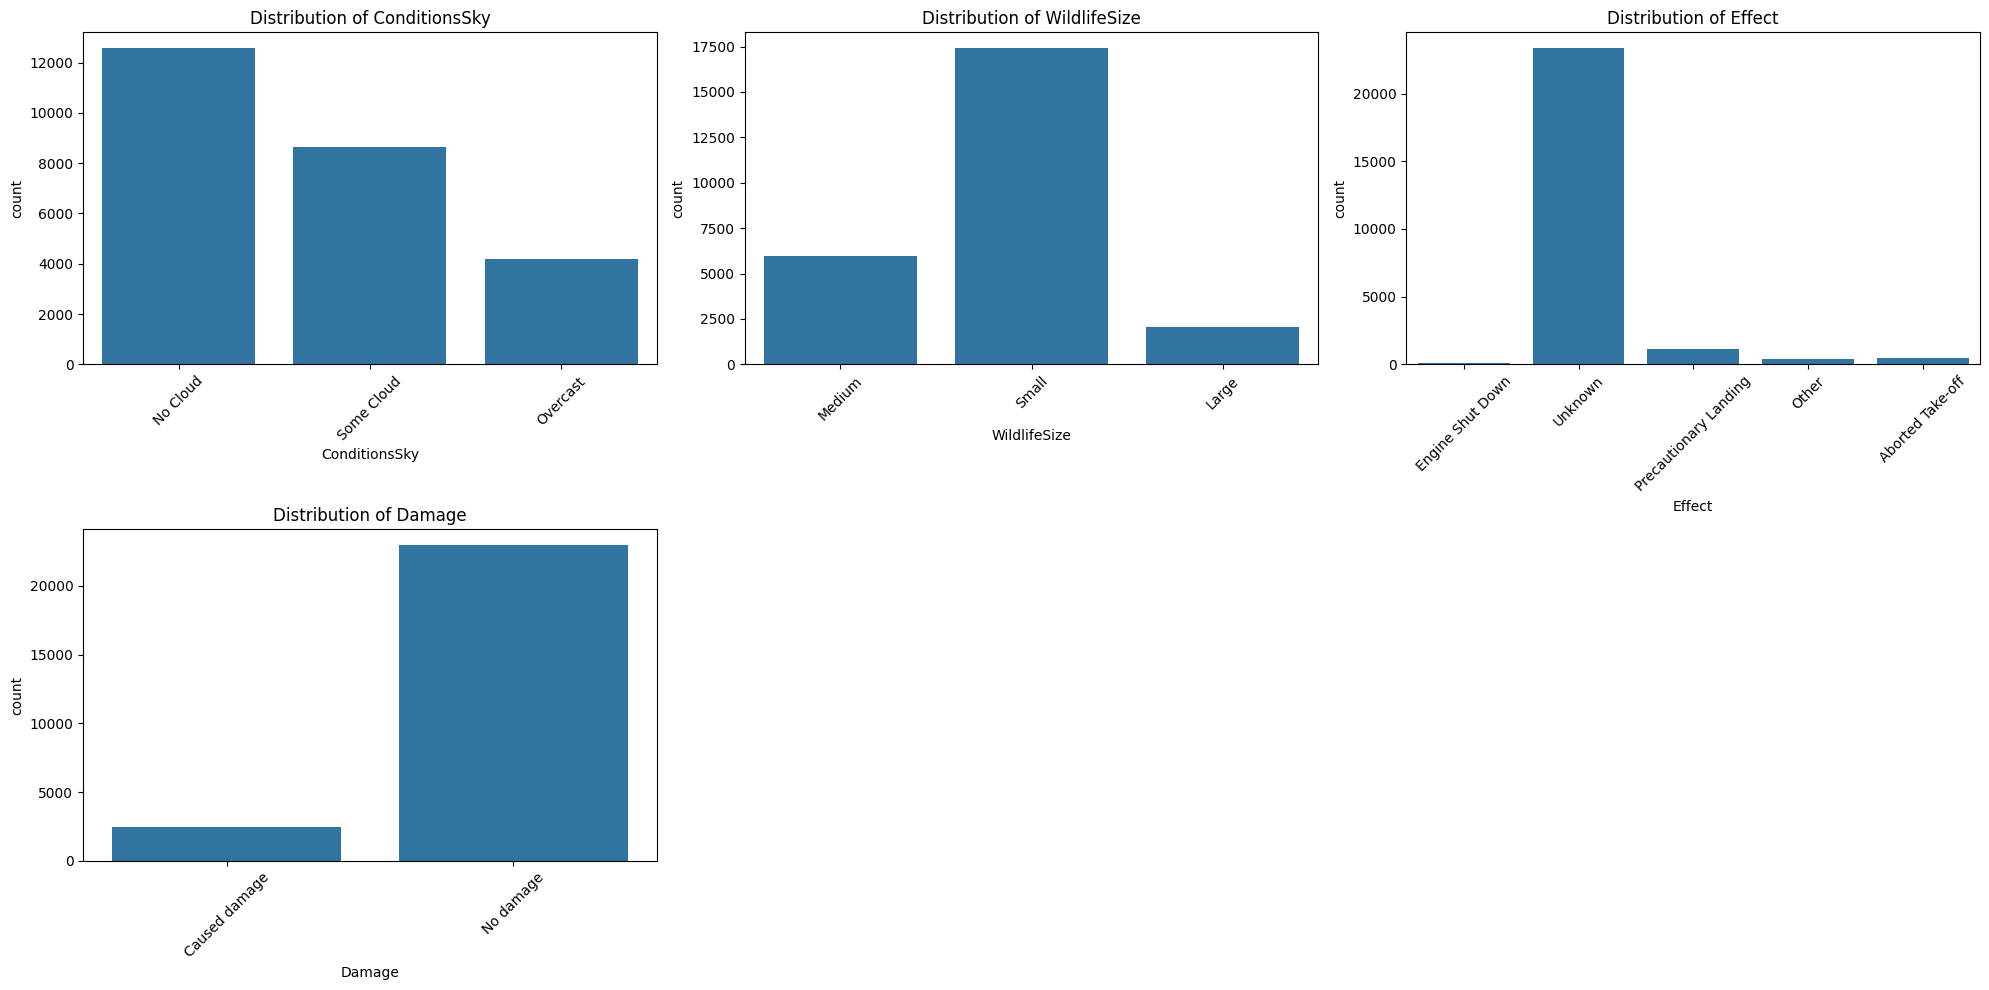

In [11]:
categorical_columns = df.select_dtypes(include="object").columns.drop('WildlifeSpecies')

#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  

plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1
for column in categorical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.countplot(x=column, data=df)
    plt.xlabel(column)  
    plt.title(f'Distribution of {column}') 
    plt.xticks(rotation=45)  
    plt_number += 1

plt.tight_layout()

plt.show()

In [12]:

df['MergedEffect'] = df['Effect'] + ' - ' + df['Damage']

# Drop 'Effect' and 'Damage' columns
df = df.drop(columns=['Effect', 'Damage'])



In [13]:
df.head()

,ConditionsSky,NumberStruckActual,WildlifeSpecies,WildlifeSize,MergedEffect
0,No Cloud,859,Unknown bird - medium,Medium,Engine Shut Down - Caused damage
1,Some Cloud,424,Rock pigeon,Small,Unknown - Caused damage
2,No Cloud,261,European starling,Small,Unknown - No damage
3,Some Cloud,806,European starling,Small,Precautionary Landing - No damage
4,No Cloud,942,European starling,Small,Unknown - No damage


In [14]:
df['MergedEffect'].unique()

array(['Engine Shut Down - Caused damage', 'Unknown - Caused damage',
       'Unknown - No damage', 'Precautionary Landing - No damage',
       'Other - Caused damage', 'Aborted Take-off - No damage',
       'Aborted Take-off - Caused damage',
       'Precautionary Landing - Caused damage', 'Other - No damage',
       'Engine Shut Down - No damage'], dtype=object)

In [15]:
# Define risk scores for each factor
weather_scores = {
    'No Cloud': 1,
    'Some Cloud': 2,
    'Overcast': 3
}


size_scores = {
    'Small': 1,
    'Medium': 2,
    'Large': 3
}

impact_scores = {
    'Engine Shut Down - Caused damage': 10,
    'Engine Shut Down - No damage': 8,
    'Unknown - Caused damage': 3,
    'Unknown - No damage': 1,
    'Precautionary Landing - Caused damage': 5,
    'Precautionary Landing - No damage': 3,
    'Other - Caused damage': 4,
    'Other - No damage': 2,
    'Aborted Take-off - Caused damage': 10,
    'Aborted Take-off - No damage': 8
}

# Calculate alert score
def calculate_alert_score(row):
    num_species = row['NumberStruckActual']
    size_score = size_scores.get(row['WildlifeSize'], 0)
    
    weather_score = weather_scores.get(row['ConditionsSky'], 0)
    impact_score = impact_scores.get(row['MergedEffect'], 0)
    
    bird_risk_score = num_species * size_score
    return bird_risk_score +weather_score + impact_score

df['AlertScore'] = df.apply(calculate_alert_score, axis=1)

print(df)


      ConditionsSky  NumberStruckActual        WildlifeSpecies WildlifeSize  \
0          No Cloud                 859  Unknown bird - medium       Medium   
1        Some Cloud                 424            Rock pigeon        Small   
2          No Cloud                 261      European starling        Small   
3        Some Cloud                 806      European starling        Small   
4          No Cloud                 942      European starling        Small   
...             ...                 ...                    ...          ...   
25424      No Cloud                   1                Mallard       Medium   
25425      Overcast                   1   Unknown bird - large        Large   
25426    Some Cloud                   1           Tree swallow        Small   
25427    Some Cloud                   1  Unknown bird - medium       Medium   
25428      No Cloud                   1        Red-tailed hawk       Medium   

                            MergedEffect  AlertScor

In [16]:

df = df.drop(columns='MergedEffect')
df = df.drop(columns='WildlifeSpecies')

df.head()

,ConditionsSky,NumberStruckActual,WildlifeSize,AlertScore
0,No Cloud,859,Medium,1729
1,Some Cloud,424,Small,429
2,No Cloud,261,Small,263
3,Some Cloud,806,Small,811
4,No Cloud,942,Small,944


{'whiskers': [<matplotlib.lines.Line2D at 0x23ce7ec4c80>,
 'caps': [<matplotlib.lines.Line2D at 0x23ce7b438f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ce7af2300>],
 'medians': [<matplotlib.lines.Line2D at 0x23ce7ec5580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ce7ec57f0>],
 'means': []}

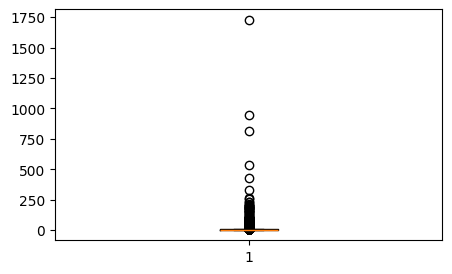

In [17]:
plt.figure(figsize=[5,3])
plt.boxplot(df['AlertScore'])

In [18]:
def categorize_risk(alert_score):
    if alert_score <= 5:
        return 'Small'
    elif alert_score <= 14:
        return 'Moderate'
    else:
        return 'High'

# Apply the categorization to create the Risk feature
df['Risk'] = df['AlertScore'].apply(categorize_risk)

print(df[['AlertScore', 'Risk']])

       AlertScore      Risk
0            1729      High
1             429      High
2             263      High
3             811      High
4             944      High
...           ...       ...
25424           4     Small
25425           7  Moderate
25426           4     Small
25427           5     Small
25428           6  Moderate

[25429 rows x 2 columns]


<Axes: xlabel='count', ylabel='Risk'>

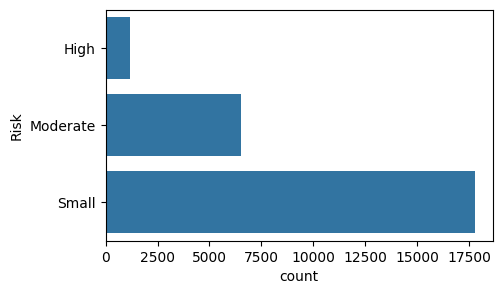

In [19]:
plt.figure(figsize=[5,3])
sns.countplot(data=df['Risk'])

In [20]:
df.to_csv('Risk_Analysis.csv', index=False)  # Save the current DataFrame to the file, erasing the previous content

# Verify the contents of the file
print("File content is now saved.")

File content is now saved.
